In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Fourier series representation

In [2]:
def ctfs_coef(xt,T,n):
  cn=list()
  for i in range(n):
    sum=0
    for k,t in enumerate(xt):
      sum+=xt[k]*np.exp(complex(0,-(2*np.pi*t*i)/T))
    cn.append(np.round(sum/T,3))
   
  return cn

def ctfs(xt,T,n,t):
  Cn=ctfs_coef(xt,T,n)
  Xt=list()
  for t1 in t:
    x_t=0
    for n,cn in enumerate(Cn):
      x_t+=cn*np.exp(complex(0,(2*np.pi*n*t1/T)))
    Xt.append(np.round(x_t,3))
  return Xt

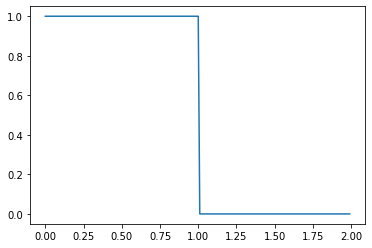

In [3]:
t=np.arange(0,2,.01)
x_t=1*((t>=0)*(t<=1))
plt.plot(t,x_t)
plt.show()

In [4]:
def generate_train(x,t,N,T):
  x=x.tolist()
  step=t[2]-t[1]
  initial=t[0]
  t1=(np.arange(initial,N*T,step)).tolist()
  xt=list()
  for i in range(N):
    xt=xt+x
  plt.plot(t1,xt)
  plt.xlabel("time(s)...>")
  plt.ylabel("amplitude..>")
  plt.show()


  

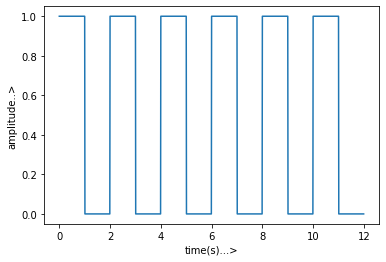

In [5]:
generate_train(x_t,t,6,2)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


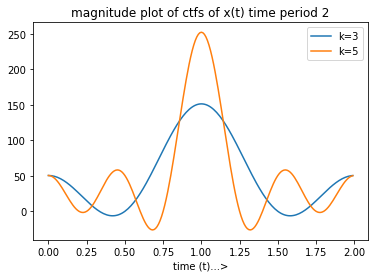

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


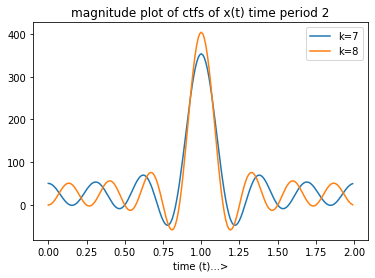

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


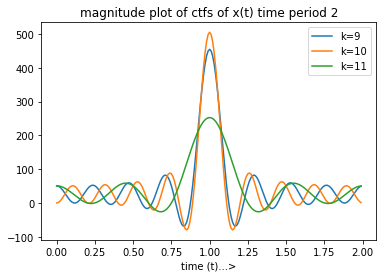

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


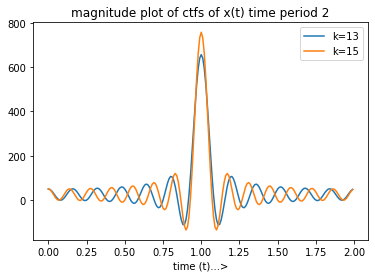

In [6]:
Xt1=ctfs(x_t,2,3,t) #taking 3 number of fourier coefficient, 2 as time period  
Xt2=ctfs(x_t,2,5,t) #taking 5 number of fourier coefficient, 2 as time period  
Xt3=ctfs(x_t,2,7,t) #taking 7 number of fourier coefficient, 2 as time period  
Xt4=ctfs(x_t,2,8,t) #taking 8 number of fourier coefficient, 2 as time period  
Xt5=ctfs(x_t,2,9,t) #taking 9 number of fourier coefficient, 2 as time period  
Xt6=ctfs(x_t,2,10,t) #taking 10 number of fourier coefficient, 2 as time period  
Xt7=ctfs(x_t,2,5,t) #taking 11 number of fourier coefficient, 2 as time period  
Xt8=ctfs(x_t,2,13,t) #taking 13 number of fourier coefficient, 2 as time period  
Xt9=ctfs(x_t,2,15,t) #taking 15 number of fourier coefficient, 2 as time period  
plt.figure(1)
plt.plot(t,Xt1,label="k=3")
plt.plot(t,Xt2,label="k=5")
plt.title("magnitude plot of ctfs of x(t) time period 2")
plt.xlabel("time (t)...>")
plt.legend()
plt.show()
plt.figure(2)
plt.plot(t,Xt3,label="k=7")
plt.plot(t,Xt4,label="k=8")
plt.title("magnitude plot of ctfs of x(t) time period 2")
plt.xlabel("time (t)...>")
plt.legend()
plt.show()
plt.figure(3)
plt.plot(t,Xt5,label="k=9")
plt.plot(t,Xt6,label="k=10")
plt.plot(t,Xt7,label="k=11")
plt.title("magnitude plot of ctfs of x(t) time period 2")
plt.xlabel("time (t)...>")
plt.legend()
plt.show()
plt.figure(4)
plt.plot(t,Xt8,label="k=13")
plt.plot(t,Xt9,label="k=15")
plt.title("magnitude plot of ctfs of x(t) time period 2")
plt.xlabel("time (t)...>")
plt.legend()
plt.show()

As number of term increases the number of ocsillation increases

2.Spectral leakage and windowing

In [7]:

def W(N,n):
  return np.round(np.exp(complex(0,(-2*np.pi*n)/N)),3)
###########
def dft_mat(N):
  mat=list()
  for i in range(N):
    a=list()
    for j in range(N):
      a.append(W(N,i*j))
    mat.append(a)
  mat=np.array(mat)
  return mat
 ################
def idft_mat(N):
  mat=list()
  for i in range(N):
    a=list()
    for j in range(N):
      a.append(W(N,-i*j)/N)
    mat.append(a)
  mat=np.array(mat)
  return mat
############

# define DFT
def dft(xn,N):
  xn=np.array(xn)
  Wk=dft_mat(N)
  Xk=np.dot(Wk,xn.T)
  return Xk.tolist()
 
#inverse DFT
def idft(xk,N):
  xk=np.array(xk)
  Wk=idft_mat(N)
  xn=np.dot(Wk,xk.T)
  return xn.tolist()

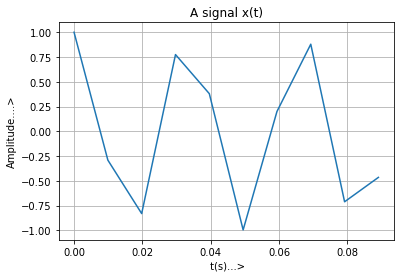

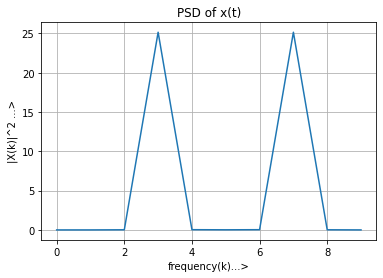

In [8]:
n=np.arange(0,10,1)
f=30
t=(.99/100)*n
xt=np.cos(2*np.pi*f*t)
N=len(n)
XK=dft(xt,N)
psd=[abs(i)**2 for i in XK]
plt.figure(1)
plt.plot(t,xt)
plt.title("A signal x(t)")
plt.ylabel("Amplitude....>")
plt.xlabel(" t(s)...>")
plt.grid()
plt.show()
plt.figure(2)
plt.plot(n,psd)
plt.title("PSD of x(t)")
plt.ylabel("|X(k)|^2 ...>")
plt.grid()
plt.xlabel("frequency(k)...>")
plt.show()

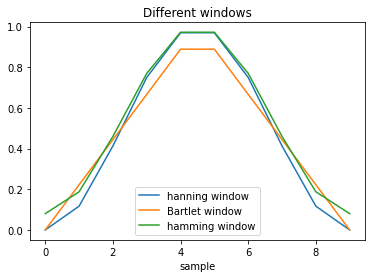

In [9]:
def hanning(n):
  M=len(n)
  return .5-.5*np.cos(2*np.pi*n/(M-1))

def Bartlett(n):
  M=len(n)
  return (2/(M-1))*(((M-1)/2)-abs(n-((M-1)/2)))

def Hamming(n):
  M=len(n)
  return .54-.46*np.cos(2*np.pi*n/(M-1)) 

hann_wind=hanning(n)
Bart_wind=Bartlett(n)
hamm_wind=Hamming(n)
plt.plot(n,hann_wind,label="hanning window")
plt.plot(n,Bart_wind,label="Bartlet window")
plt.plot(n,hamm_wind,label="hamming window")
plt.title("Different windows")
plt.xlabel("sample")
plt.legend()
plt.show()

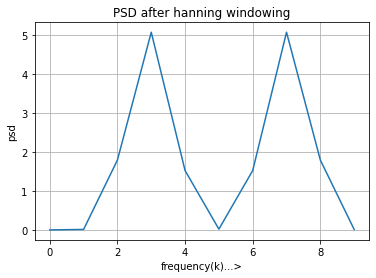

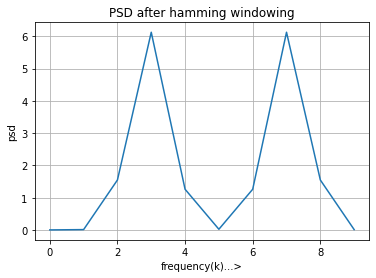

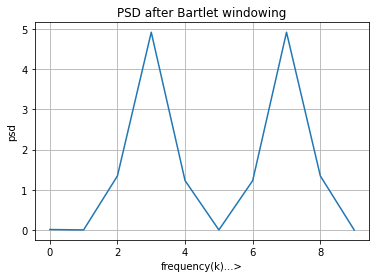

In [10]:
xt_hann_wind=[xt[i]*hann_wind[i] for i in range(len(n))]
XK_hann_wind=dft(xt_hann_wind,N)
psd1=[abs(i)**2 for i in XK_hann_wind]

xt_hamm_wind=[xt[i]*hamm_wind[i] for i in range(len(n))]
XK_hamm_wind=dft(xt_hamm_wind,N)
psd2=[abs(i)**2 for i in XK_hamm_wind]

xt_Bart_wind=[xt[i]*Bart_wind[i] for i in range(len(n))]
XK_Bart_wind=dft(xt_Bart_wind,N)
psd3=[abs(i)**2 for i in XK_Bart_wind]

plt.figure(1)
plt.plot(n,psd1)
plt.title("PSD after hanning windowing")
plt.ylabel("psd")
plt.xlabel("frequency(k)...>")
plt.grid()
plt.show()

plt.figure(2)
plt.plot(n,psd2)
plt.title("PSD after hamming windowing")
plt.ylabel("psd")
plt.xlabel("frequency(k)...>")
plt.grid()
plt.show()

plt.figure(3)
plt.plot(n,psd3)
plt.title("PSD after Bartlet windowing")
plt.ylabel("psd")
plt.xlabel("frequency(k)...>")
plt.grid()
plt.show()

3.Denoising 

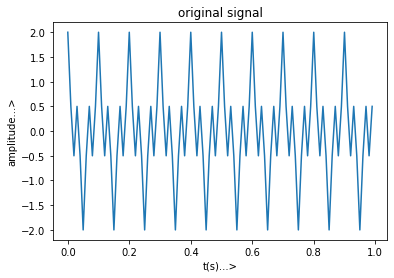

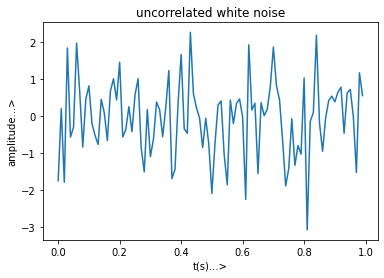

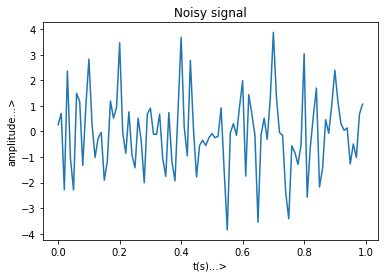

In [11]:
from random import gauss
t=np.arange(0,1,.01)
f1=10
f2=30
gt=np.cos(2*np.pi*f1*t)+np.cos(2*np.pi*f2*t)
plt.figure(1)
plt.plot(t,gt)
plt.title("original signal")
plt.xlabel("t(s)...>")
plt.ylabel("amplitude...>")
plt.show()

white = [gauss(0.0, 1.0) for i in range(len(t))]
plt.figure(2)
plt.plot(t,white)
plt.title("uncorrelated white noise")
plt.xlabel("t(s)...>")
plt.ylabel("amplitude...>")
plt.show()

yt=[gt[i]+white[i] for i in range(len(t))]
plt.figure(3)
plt.plot(t,yt)
plt.title("Noisy signal")
plt.xlabel("t(s)...>")
plt.ylabel("amplitude...>")
plt.show()

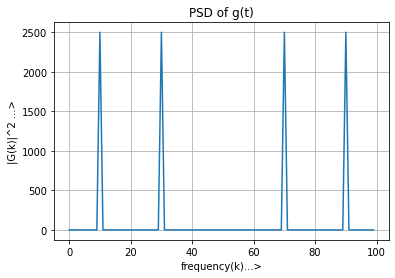

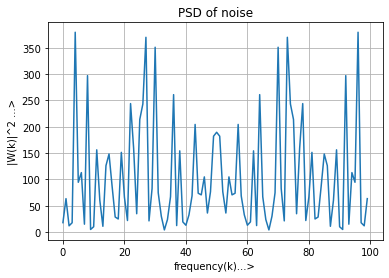

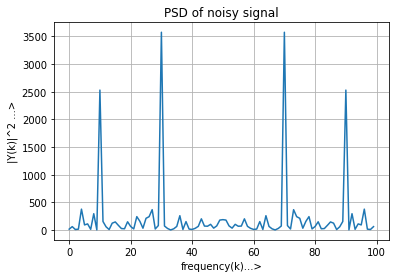

In [12]:
n=100*t
N=len(n)
YK=dft(yt,N)
GK=dft(gt,N)
WK=dft(white,N)
psd1=[abs(i)**2 for i in GK]
psd2=[abs(i)**2 for i in YK]
psd3=[abs(i)**2 for i in WK]

plt.figure(1)
plt.plot(n,psd1)
plt.title("PSD of g(t)")
plt.ylabel("|G(k)|^2 ...>")
plt.grid()
plt.xlabel("frequency(k)...>")
plt.show()


plt.figure(2)
plt.plot(n,psd3)
plt.title("PSD of noise")
plt.ylabel("|W(k)|^2 ...>")
plt.grid()
plt.xlabel("frequency(k)...>")
plt.show()

plt.figure(3)
plt.plot(n,psd2)
plt.title("PSD of noisy signal")
plt.ylabel("|Y(k)|^2 ...>")
plt.grid()
plt.xlabel("frequency(k)...>")
plt.show()

In [13]:
filtered_psd=list()
threshold=1400
for i in range(len(psd1)):
  if psd2[i]>threshold:
    filtered_psd.append(psd2[i])
  else:
    filtered_psd.append(0)
  

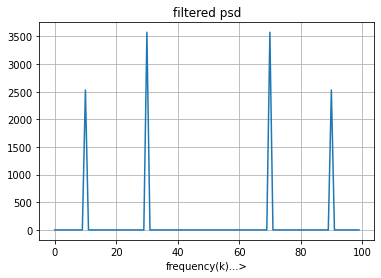

In [14]:
plt.plot(n,filtered_psd)
plt.title("filtered psd")
plt.grid()
plt.xlabel("frequency(k)...>")
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


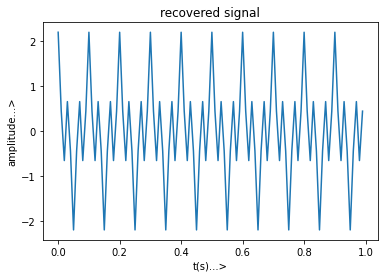

In [15]:
F_k=[(filtered_psd[i])**.5 for i in range(len(filtered_psd))]
recoverd_x=idft(F_k,len(filtered_psd))
plt.plot(t,recoverd_x)
plt.title("recovered signal")
plt.xlabel("t(s)...>")
plt.ylabel("amplitude...>")
plt.show()